<a href="https://colab.research.google.com/github/baniksushobhan/FreeLancer/blob/main/USAccidentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

US Accidents Exploratory Data Analysis

## DownLoad the Data

In [2]:
pip install opendatasets --upgrade

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [9]:
data_filename='./us-accidents/US_Accidents_March23.csv'
data_fileName2='./us-jobs-on-monstercom/monster_com-job_sample.csv'

## Data Preparation and cleaning

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

In [8]:
import pandas as pd



In [12]:

    df = pd.read_csv(data_filename)

Exploratory Analysis and Visualization

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

## How many numeric columns do we have?

In [17]:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [22]:
df.isna().sum()

,0
ID,0
Source,0
Severity,0
Start_Time,0
End_Time,0
Start_Lat,0
Start_Lng,0
End_Lat,3402762
End_Lng,3402762
Distance(mi),0


## Percentage of missing values per column


In [14]:
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentage

,0
End_Lat,4.402935e-01
End_Lng,4.402935e-01
Precipitation(in),2.851286e-01
Wind_Chill(F),2.586590e-01
Wind_Speed(mph),7.391355e-02
Visibility(mi),2.291524e-02
Wind_Direction,2.267043e-02
Humidity(%),2.253301e-02
Weather_Condition,2.244438e-02
Temperature(F),2.120143e-02


In [15]:
missing_percentage[missing_percentage != 0]

,0
End_Lat,4.402935e-01
End_Lng,4.402935e-01
Precipitation(in),2.851286e-01
Wind_Chill(F),2.586590e-01
Wind_Speed(mph),7.391355e-02
Visibility(mi),2.291524e-02
Wind_Direction,2.267043e-02
Humidity(%),2.253301e-02
Weather_Condition,2.244438e-02
Temperature(F),2.120143e-02


<Axes: >

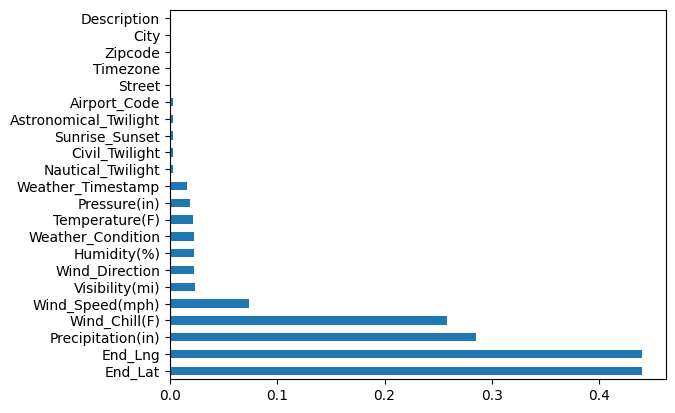

In [16]:
missing_percentage[missing_percentage != 0].plot(kind='barh')

## Exploratory Analysis and Visualization

Columns we'll analyze:

1. City
2. Start Time
3. Start_Lat & Start_Lng
4. Temparature
5. Weather Condition

In [18]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [17]:
cities= df.City.unique()
len(cities)

13679

In [18]:
cities_by_accident = df.City.value_counts()
cities_by_accident

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
...,...
Benkelman,1
Old Appleton,1
Wildrose,1


In [19]:
cities_by_accident[:20]

,count
City,
Miami,186917
Houston,169609
Los Angeles,156491
Charlotte,138652
Dallas,130939
Orlando,109733
Austin,97359
Raleigh,86079
Nashville,72930


In [20]:
type(cities_by_accident)

pandas.core.series.Series

<Axes: ylabel='City'>

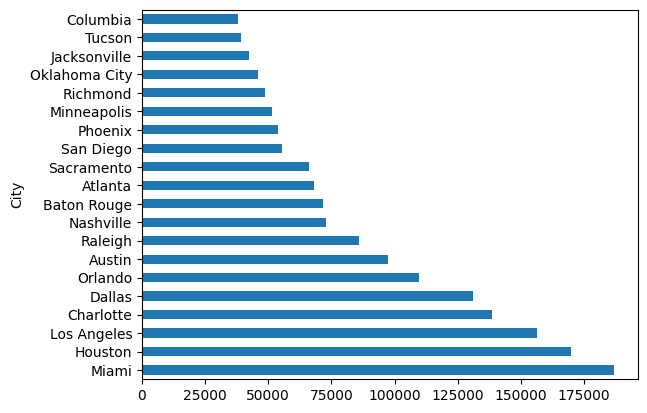

In [21]:
cities_by_accident[:20].plot(kind='barh')

In [22]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-23-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)


<Axes: xlabel='count', ylabel='Density'>

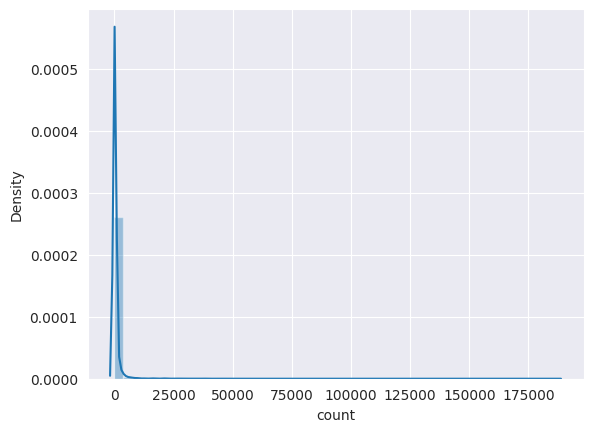

In [23]:
sns.distplot(cities_by_accident)

In [24]:
  df.Start_Time

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


In [25]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='ISO8601', errors='coerce')
df['Start_Time']

,Start_Time
0,2016-02-08 05:46:00
1,2016-02-08 06:07:59
2,2016-02-08 06:49:27
3,2016-02-08 07:23:34
4,2016-02-08 07:39:07
...,...
7728389,2019-08-23 18:03:25
7728390,2019-08-23 19:11:30
7728391,2019-08-23 19:00:21
7728392,2019-08-23 19:00:21


<Axes: xlabel='Start_Time', ylabel='Count'>

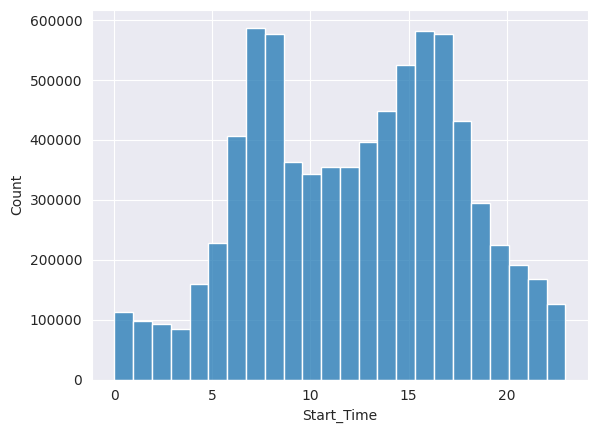

In [26]:
sns.histplot(df.Start_Time.dt.hour,bins=24)

- A most accidents happen between 6 to 10AM.

In [25]:
df.Start_Time.dt.year

,Start_Time
0,2016
1,2016
2,2016
3,2016
4,2016
...,...
7728389,2019
7728390,2019
7728391,2019
7728392,2019


<ipython-input-27-779eedad9e59>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2019.Start_Time.dt.month,bins=7,kde=False, norm_hist=True)


<Axes: xlabel='Start_Time'>

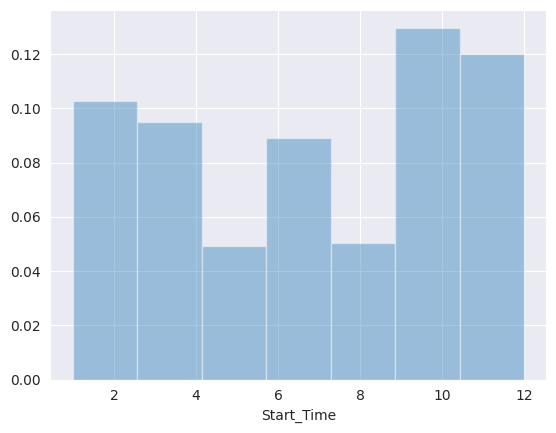

In [27]:
df_2019=df[df.Start_Time.dt.year == 2019]
sns.distplot(df_2019.Start_Time.dt.month,bins=7,kde=False, norm_hist=True)

Is the distribution of accidents by hour the same on weekends as on weekdays?

<Axes: ylabel='count'>

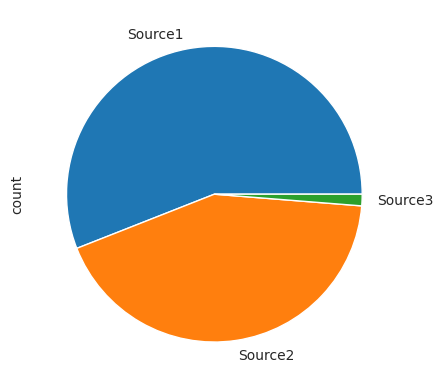

In [28]:
df.Source.value_counts().plot(kind='pie')

In [ ]:
## Start Latitude & Longitude

In [29]:
df.Start_Lng

,Start_Lng
0,-84.058723
1,-82.831184
2,-84.032608
3,-84.205582
4,-84.188354
...,...
7728389,-117.379360
7728390,-117.148060
7728391,-117.847790
7728392,-118.403020


<Axes: xlabel='Start_Lng', ylabel='Start_Lat'>

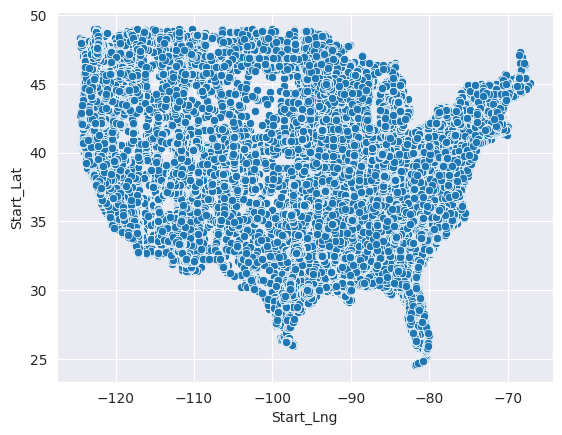

In [30]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat)

In [31]:
import folium

In [32]:
from folium.plugins import HeatMap

In [33]:
from folium.plugins import HeatMap

In [39]:
sample_df=df.sample(int(0.001* len(df)))
lat_lon_pairs= list(zip(list(df.Start_Lat), list(df.Start_Lng)))

In [40]:
map=folium.Map()
HeatMap(lat_lon_pairs[:100]).add_to(map)
map

## Ask & answer questions

1. Are there more accidents in warmer or colder areas?
2. Which 5 states have the highest number of accidents? How about per capita?
3. Among the top 100 cities in number of accidents , which states do they belong to most frequently.
4. WHat time of the day are accidents most frequent in?
5. Which  days of the week have the most accidents?
6. which months have the most accidents?
7. what is the trend of the accidents year over year (incresing/decresing)?
8.